In [75]:
# imports and load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

data = pd.read_csv("main dataset.csv")

In [76]:
# Counts of roads by highway
highway_counts_df = data['highway'].value_counts().reset_index()
highway_counts_df.columns = ['highway', 'count']
print("\nCounts of roads by highway ")
highway_counts_df


Counts of roads by highway 


,highway,count
0,tertiary,3508
1,secondary,1214
2,primary,551
3,trunk,188


In [77]:
#  Mean/median segment length and width by highway type
segment_summary = data.groupby('highway')[['segment_length', 'segment_width']].agg(['mean', 'median'])
print("\nMean/Median segment length & width by highway:")
segment_summary


Mean/Median segment length & width by highway:


segment_length              segment_width           
                    mean       median          mean     median
highway                                                       
primary      8344.469874  3015.734448     26.387350  24.460436
secondary    4777.104350  1950.666491     24.724863  22.889270
tertiary     1588.282552   753.215319     23.969893  21.630473
trunk       14958.886292  4749.137867     25.807923  24.161540

In [78]:
#  surface frequency 
surface_counts_df = data['surface'].value_counts().reset_index()
surface_counts_df.columns = ['surface', 'count']

print("\nCounts by surface type")
surface_counts_df


Counts by surface type


,surface,count
0,concrete,4223
1,asphalt,820
2,paved,248
3,unpaved,129
4,gravel,15
5,metal,14
6,compacted,4
7,ground,2
8,paving_stones,2
9,concrete/asphalt,1


In [79]:
#  Mean segment width & curvature by Urban/Rural classification 
classification_summary = data.groupby('classification')[['segment_width', 'mean_curvature']].mean()
print("\nMean segment width & curvature by classification:")
classification_summary


Mean segment width & curvature by classification:


,segment_width,mean_curvature
classification,,
Rural,23.80527,0.003385
Urban,24.52908,0.003934


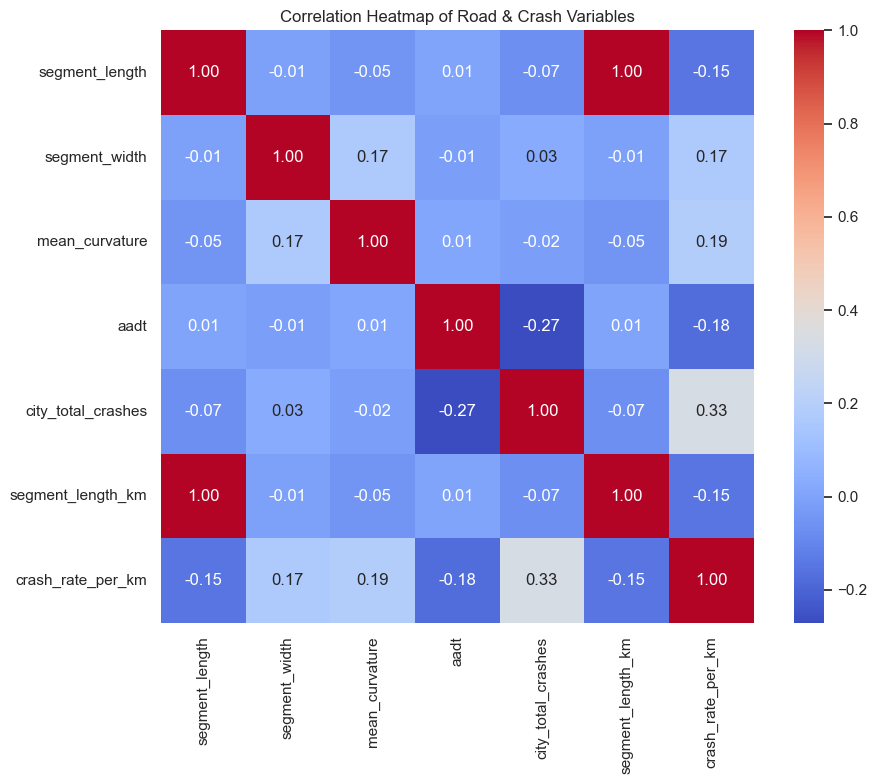


Correlation matrix:


,segment_length,segment_width,mean_curvature,aadt,city_total_crashes,segment_length_km,crash_rate_per_km
segment_length,1.000000,-0.008768,-0.048666,0.006300,-0.071658,1.000000,-0.151338
segment_width,-0.008768,1.000000,0.167391,-0.014383,0.031377,-0.008768,0.166714
mean_curvature,-0.048666,0.167391,1.000000,0.009342,-0.017624,-0.048666,0.185870
aadt,0.006300,-0.014383,0.009342,1.000000,-0.271564,0.006300,-0.176560
city_total_crashes,-0.071658,0.031377,-0.017624,-0.271564,1.000000,-0.071658,0.332427
segment_length_km,1.000000,-0.008768,-0.048666,0.006300,-0.071658,1.000000,-0.151338
crash_rate_per_km,-0.151338,0.166714,0.185870,-0.176560,0.332427,-0.151338,1.000000


In [80]:
# Correlation matrix 
corr_vars = ['segment_length', 'segment_width', 'mean_curvature',
             'aadt', 'city_total_crashes', 'segment_length_km', 'crash_rate_per_km']
correlation_matrix = data[corr_vars].corr()

# Heatmap of correlation matrix 
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Road & Crash Variables')
plt.tight_layout()
plt.show()

print("\nCorrelation matrix:")
correlation_matrix

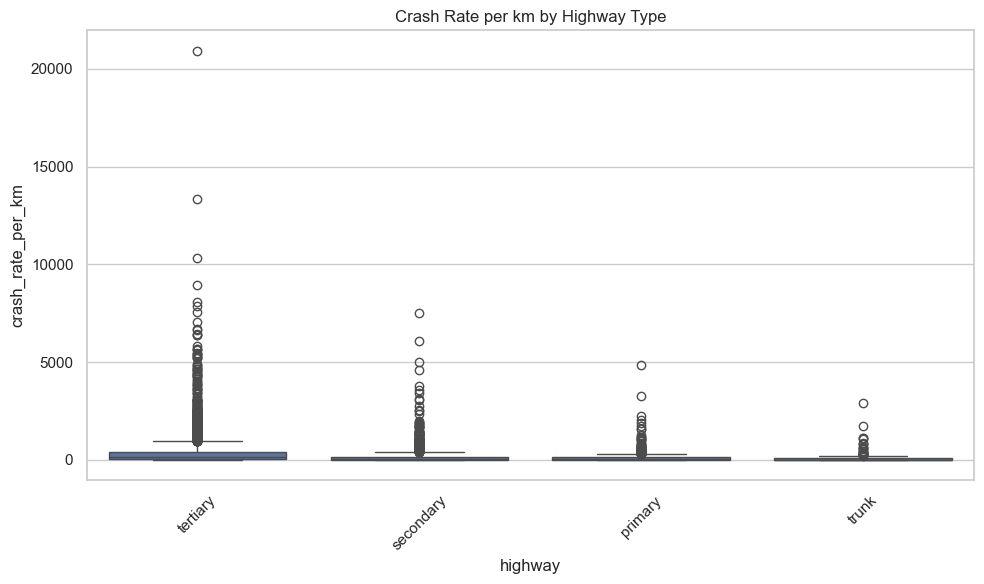

In [81]:
#  crash_rate_per_km by highway type 
plt.figure(figsize=(10,6))
sns.boxplot(x='highway', y='crash_rate_per_km', data=data)
plt.title('Crash Rate per km by Highway Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

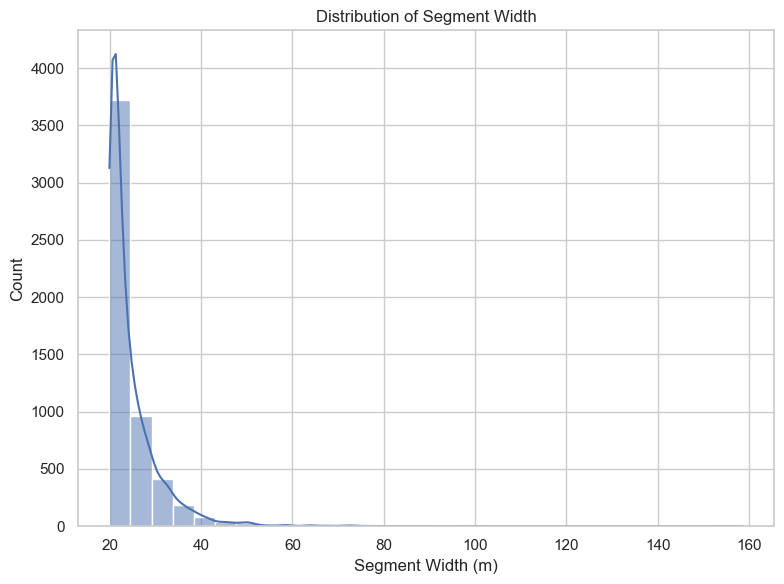

In [82]:
# segment widths 
plt.figure(figsize=(8,6))
sns.histplot(data['segment_width'], bins=30, kde=True)
plt.title('Distribution of Segment Width')
plt.xlabel('Segment Width (m)')
plt.tight_layout()
plt.show()

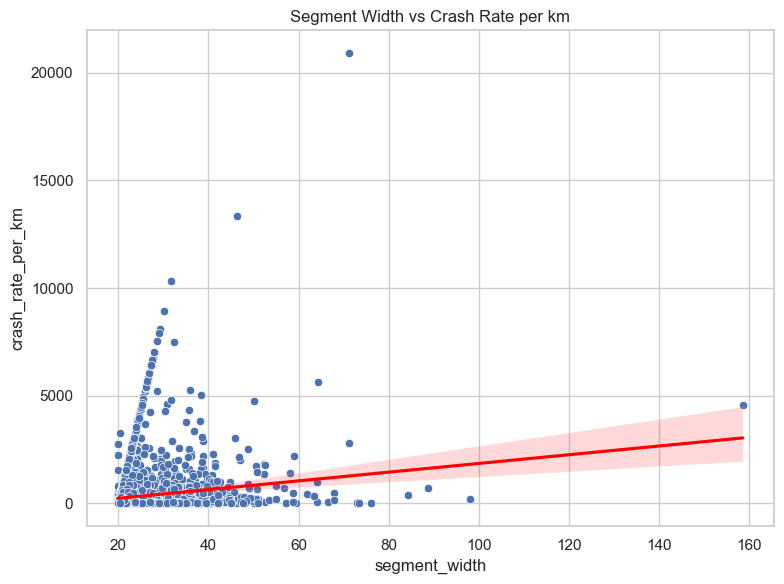

In [83]:
# segment width vs crash rate with trend line 
plt.figure(figsize=(8,6))
sns.scatterplot(x='segment_width', y='crash_rate_per_km', data=data)
sns.regplot(x='segment_width', y='crash_rate_per_km', data=data, scatter=False, color='red')
plt.title('Segment Width vs Crash Rate per km')
plt.tight_layout()
plt.show()

C:\Users\joaqu\AppData\Local\Temp\ipykernel_18152\82344983.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=surface_means.index, y=surface_means.values, palette="viridis")


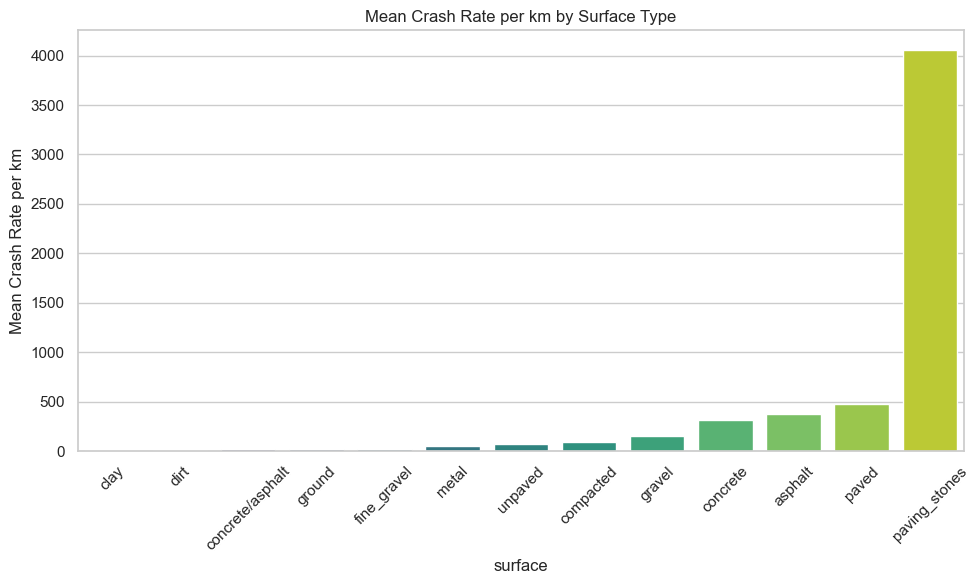

In [84]:
#  Bar chart of mean crash rate by surface type 
surface_means = data.groupby('surface')['crash_rate_per_km'].mean().sort_values()
plt.figure(figsize=(10,6))
sns.barplot(x=surface_means.index, y=surface_means.values, palette="viridis")
plt.title('Mean Crash Rate per km by Surface Type')
plt.ylabel('Mean Crash Rate per km')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [85]:
# mean AADT by Urban/Rural
aadt_by_classification_df = data.groupby('classification')['aadt'].mean().reset_index()
aadt_by_classification_df.columns = ['classification', 'mean_aadt']
print("\nMean AADT by classification")
aadt_by_classification_df


Mean AADT by classification


,classification,mean_aadt
0,Rural,13159.445669
1,Urban,15208.317862


In [86]:
# mean AADT by surface type 
aadt_by_surface_df = data.groupby('surface')['aadt'].mean().reset_index()
aadt_by_surface_df.columns = ['surface', 'mean_aadt']
aadt_by_surface_df = aadt_by_surface_df.sort_values(by='mean_aadt', ascending=False)
print("\nMean AADT by surface type")
aadt_by_surface_df


Mean AADT by surface type


,surface,mean_aadt
5,dirt,31373.000000
9,metal,20802.071429
12,unpaved,18434.627907
3,concrete,15428.603126
10,paved,13325.403226
2,compacted,13136.000000
0,asphalt,12702.159756
8,ground,8254.000000
7,gravel,6211.133333
6,fine_gravel,5980.000000


In [87]:
# Mean & Median AADT by highway type 
aadt_summary = data.groupby('highway')['aadt'].agg(['mean', 'median', 'count']).sort_values(by='mean', ascending=False)
print("\nMean, median & count of AADT by highway type:")
aadt_summary


Mean, median & count of AADT by highway type:


,mean,median,count
highway,,,
primary,15277.664247,13271.0,551
trunk,15163.510638,12358.0,188
secondary,14987.443163,12358.0,1214
tertiary,14905.387970,10859.0,3508


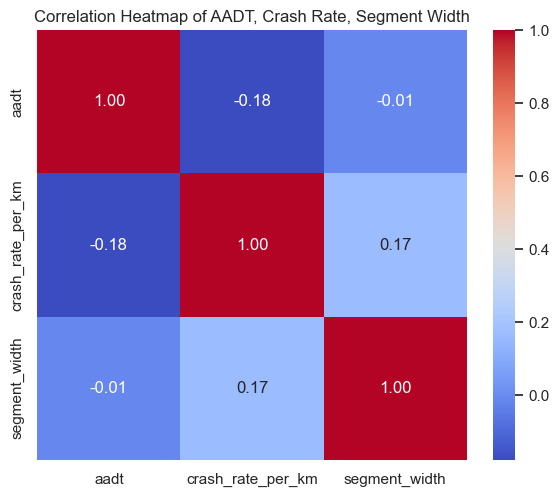


Correlation matrix for AADT, crash_rate_per_km, and segment_width:


,aadt,crash_rate_per_km,segment_width
aadt,1.000000,-0.176560,-0.014383
crash_rate_per_km,-0.176560,1.000000,0.166714
segment_width,-0.014383,0.166714,1.000000


In [88]:
#  Correlation matrix for AADT, crash_rate_per_km, segment_width 
corr_cols = ['aadt', 'crash_rate_per_km', 'segment_width']
correlations = data[corr_cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap(correlations, annot=True, cmap='coolwarm', square=True, fmt=".2f")
plt.title('Correlation Heatmap of AADT, Crash Rate, Segment Width')
plt.tight_layout()
plt.show()

print("\nCorrelation matrix for AADT, crash_rate_per_km, and segment_width:")
correlations

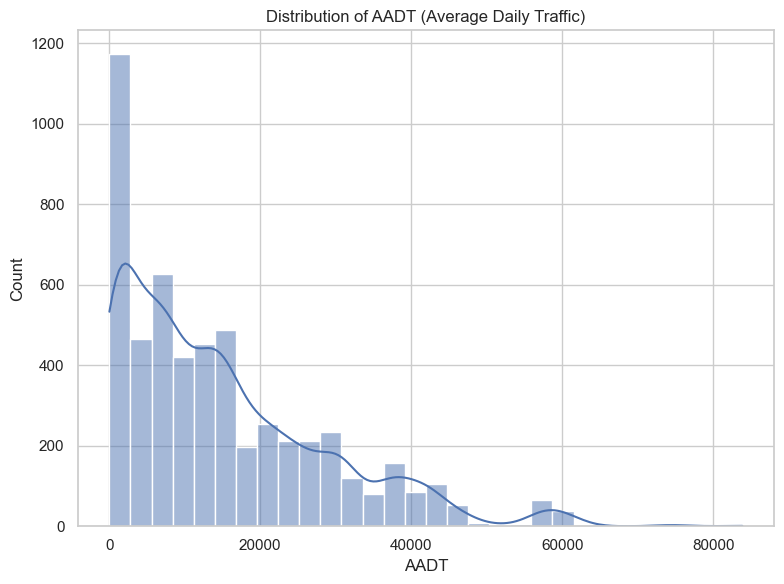

In [89]:
#  Histogram of AADT 
plt.figure(figsize=(8,6))
sns.histplot(data['aadt'], bins=30, kde=True)
plt.title('Distribution of AADT (Average Daily Traffic)')
plt.xlabel('AADT')
plt.tight_layout()
plt.show()

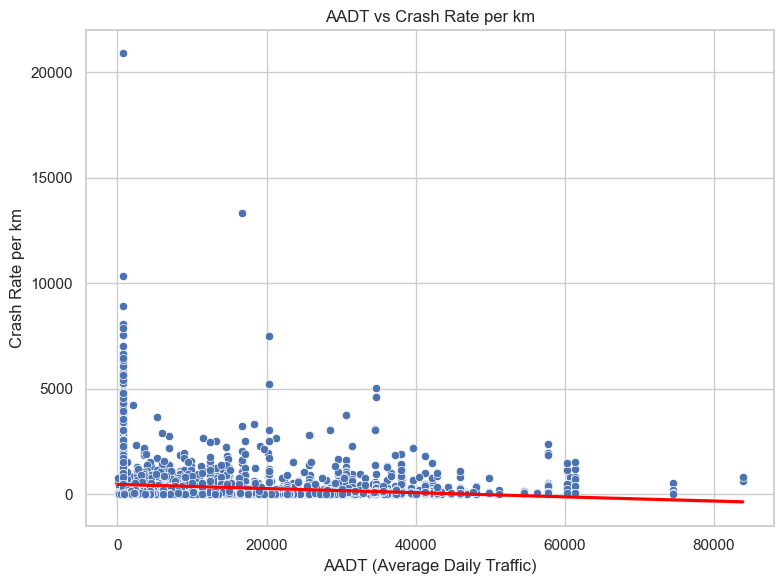

In [90]:
# AADT vs Crash Rate per km 
plt.figure(figsize=(8,6))
sns.scatterplot(x='aadt', y='crash_rate_per_km', data=data)
sns.regplot(x='aadt', y='crash_rate_per_km', data=data, scatter=False, color='red')
plt.title('AADT vs Crash Rate per km')
plt.xlabel('AADT (Average Daily Traffic)')
plt.ylabel('Crash Rate per km')
plt.tight_layout()
plt.show()


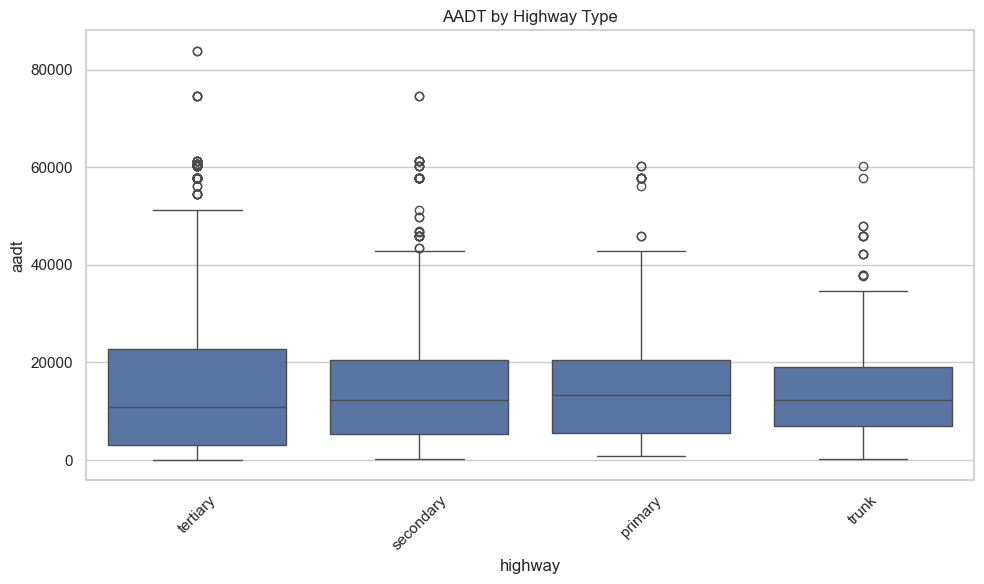

In [91]:
#  Boxplot of AADT by highway type 
plt.figure(figsize=(10,6))
sns.boxplot(x='highway', y='aadt', data=data)
plt.title('AADT by Highway Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()